In [1]:
import numpy as np
import model
import function as F
import optimizer as opt
import os

In [2]:
train_data, valid_data=F.train_data_loader()
test_data=F.test_data_loader()

In [3]:
os.getcwd()

''

In [4]:
INF=1e7

#ハイパーパラメーター
batch_size=10
D=8
epoch_num=100

#lossとかaccuracyとかの記録
stat_dict={"train_acc":[], "val_acc":[], "epoch_loss":[], "loss_list":[]}
best_acc=0

#modelとoptimizerの設定
gnn=model.GNN(D)
optimizer=opt.SGD()

#学習
for i in range(epoch_num):
    train_range=np.arange(len(train_data))
    epoch_loss=[]
    while(True): #epoch開始
        if np.all(train_range==INF): #epoch終了条件
            train_acc=F.get_accuracy(train_data, gnn)
            val_acc=F.get_accuracy(valid_data, gnn)
            stat_dict["train_acc"].append(train_acc)
            stat_dict["val_acc"].append(val_acc)
            stat_dict["epoch_loss"].append(sum(epoch_loss)/len(epoch_loss))
            if val_acc>best_acc:
                best_acc=val_acc
                gnn.save(model_name="best_model_SGD")
            print("-"*10,i, "epoch finish!","-"*10)
            print("train accuracy:", train_acc, "\t", \
                  "val accuracy:", val_acc, "\t",\
                  "epoch loss average:", sum(epoch_loss)/len(epoch_loss))
            break
        
        #indexをINFでないtrain_range内の要素からbatch size分選択し、選択したindexはINFにする。全ての要素がINFになったらepoch終了
        indexs=list(np.random.choice(train_range[train_range!=INF], batch_size, replace=False))
        train_range[indexs]=INF
        
        #1batch分の学習
        tmp_loss=0
        for idx in indexs:
            D, adj, y=train_data[idx]
 
            grads=gnn.numerical_gradient(adj, y)
            params=gnn.theta
            optimizer.update(params, grads)
        
            tmp_loss+=gnn.loss(adj, y)
        epoch_loss.append(tmp_loss/batch_size)
        stat_dict["loss_list"].append(tmp_loss/batch_size)
        
print()
print("#"*10)
print("best accuracy:", best_acc)
print("#"*10)

---------- 0 epoch finish! ----------
train accuracy: 0.5525 	 val accuracy: 0.51 	 epoch loss average: [1.86345617]
---------- 1 epoch finish! ----------
train accuracy: 0.540625 	 val accuracy: 0.505 	 epoch loss average: [0.82395068]
---------- 2 epoch finish! ----------
train accuracy: 0.54625 	 val accuracy: 0.5 	 epoch loss average: [0.73182755]
---------- 3 epoch finish! ----------
train accuracy: 0.538125 	 val accuracy: 0.475 	 epoch loss average: [0.70306489]
---------- 4 epoch finish! ----------
train accuracy: 0.536875 	 val accuracy: 0.4675 	 epoch loss average: [0.6932742]
---------- 5 epoch finish! ----------
train accuracy: 0.538125 	 val accuracy: 0.4675 	 epoch loss average: [0.68871388]
---------- 6 epoch finish! ----------
train accuracy: 0.546875 	 val accuracy: 0.48 	 epoch loss average: [0.68599753]
---------- 7 epoch finish! ----------
train accuracy: 0.55 	 val accuracy: 0.4775 	 epoch loss average: [0.68413327]
---------- 8 epoch finish! ----------
train accur

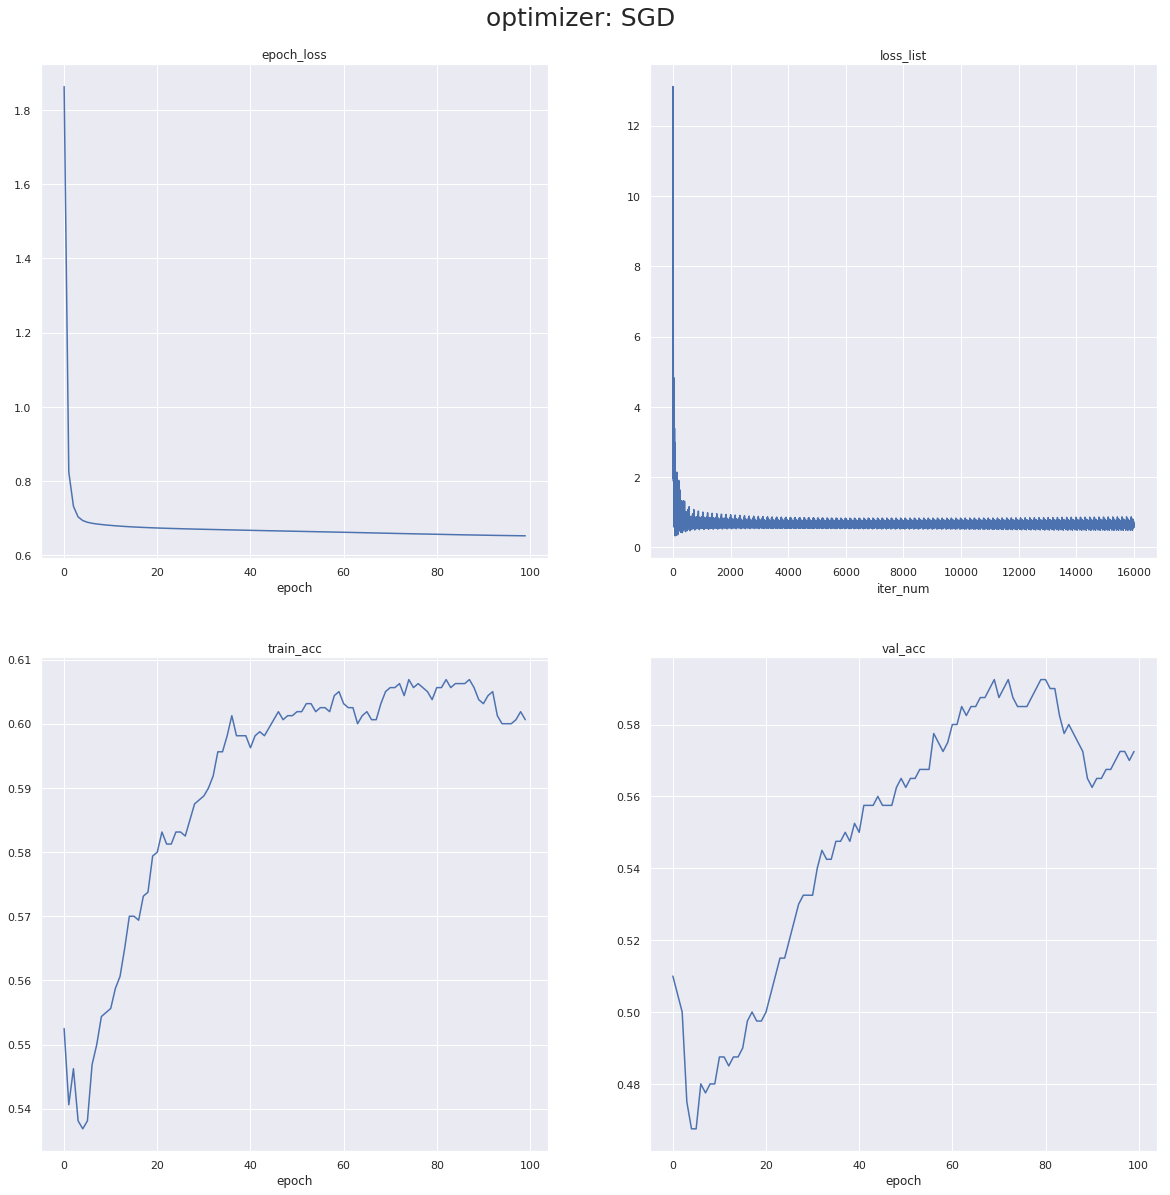

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig=plt.figure(figsize=(20,20))

for i, (k,v) in enumerate(sorted(stat_dict.items())):
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(np.arange(len(v)), v)
    ax.set_title(k)
    if k!="loss_list":
        ax.set_xlabel("epoch")
    else:
        ax.set_xlabel("iter_num")
fig.suptitle("optimizer: SGD", fontsize=25, x=0.5, y=0.92) 
plt.show()

In [11]:
for k,v in stat_dict.items():
    print(k)
    v=np.array(v)

np.savez_compressed("SGD_stat.npz", 
                   epoch_loss=stat_dict["epoch_loss"], 
                   loss_list=stat_dict["loss_list"], 
                  val_acc=stat_dict["val_acc"],
                  train_acc=stat_dict["train_acc"])

val_acc
epoch_loss
loss_list
train_acc
